# Activity: Perform multiple linear regression


## Introduction

As you have learned, multiple linear regression helps you estimate the linear relationship between one continuous dependent variable and two or more independent variables. For data science professionals, this is a useful skill because it allows you to compare more than one variable to the variable you're measuring against. This provides the opportunity for much more thorough and flexible analysis. 

For this activity, you will be analyzing a small business' historical marketing promotion data. Each row corresponds to an independent marketing promotion where their business uses TV, social media, radio, and influencer promotions to increase sales. They previously had you work on finding a single variable that predicts sales, and now they are hoping to expand this analysis to include other variables that can help them target their marketing efforts.

To address the business' request, you will conduct a multiple linear regression analysis to estimate sales from a combination of independent variables. This will include:

* Exploring and cleaning data
* Using plots and descriptive statistics to select the independent variables
* Creating a fitting multiple linear regression model
* Checking model assumptions
* Interpreting model outputs and communicating the results to non-technical stakeholders

## Step 1: Imports

### Import packages

Import relevant Python libraries and modules.

In [1]:
# Import libraries and modules.

### YOUR CODE HERE ### 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

### Load dataset

`Pandas` was used to load the dataset `marketing_sales_data.csv` as `data`, now display the first five rows. The variables in the dataset have been adjusted to suit the objectives of this lab. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA.

### YOUR CODE HERE ### 
data = pd.read_csv('/kaggle/input/google-adv-data-analytics-basicml-datasets/5_marketing_sales_data.csv')

# Display the first five rows.

### YOUR CODE HERE ### 

data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


## Step 2: Data exploration

### Familiarize yourself with the data's features

Start with an exploratory data analysis to familiarize yourself with the data and prepare it for modeling.

The features in the data are:

* TV promotional budget (in "Low," "Medium," and "High" categories)
* Social media promotional budget (in millions of dollars)
* Radio promotional budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in "Mega," "Macro," "Micro," and "Nano" categories)


**Question:** What are some purposes of EDA before constructing a multiple linear regression model?

* understand the current dataset with target and feature variables
* perform data cleaning and validation (handle missing values, outliers and other errors)
* find out how each variable is distributed, related to each other
* visualize for better understanding

### Create a pairplot of the data

Create a pairplot to visualize the relationship between the continous variables in `data`.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


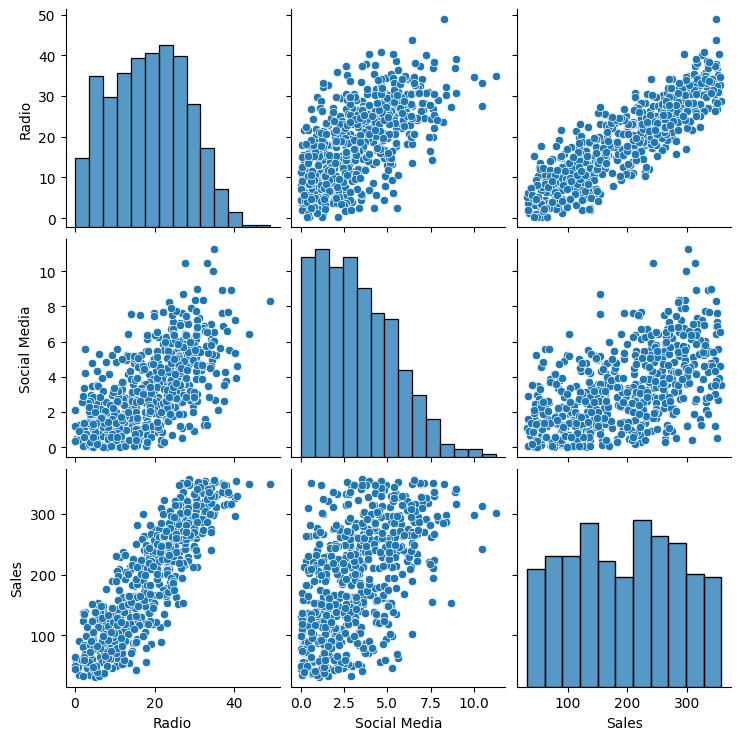

In [3]:
# Create a pairplot of the data.

### YOUR CODE HERE ### 

sns.pairplot(data)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content where creating a pairplot is demonstrated](https://www.coursera.org/learn/regression-analysis-simplify-complex-data-relationships/item/dnjWm).

</details>


<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the function in the `seaborn` library that allows you to create a pairplot showing the relationships between variables in the data.

</details>


<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use the `pairplot()` function from the `seaborn` library and pass in the entire DataFrame.

</details>


**Question:** Which variables have a linear relationship with `Sales`? Why are some variables in the data excluded from the preceding plot?



* based on observation alone, Radio and Sales have a high linear relation
* Since the other variables are categorical they are left out in the pairplot

### Calculate the mean sales for each categorical variable

There are two categorical variables: `TV` and `Influencer`. To characterize the relationship between the categorical variables and `Sales`, find the mean `Sales` for each category in `TV` and the mean `Sales` for each category in `Influencer`. 

In [4]:
# Calculate the mean sales for each TV category. 

### YOUR CODE HERE ### 

print(data.groupby('TV')['Sales'].mean(), '\n')

# Calculate the mean sales for each Influencer category. 

### YOUR CODE HERE ### 

print(data.groupby('Influencer')['Sales'].mean())

TV
High      300.529591
Low        91.646843
Medium    199.023461
Name: Sales, dtype: float64 

Influencer
Macro    205.660047
Mega     180.385096
Micro    198.655080
Nano     190.777766
Name: Sales, dtype: float64


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Find the mean `Sales` when the `TV` promotion is `High`, `Medium`, or `Low`.
    
Find the mean `Sales` when the `Influencer` promotion is `Macro`, `Mega`, `Micro`, or `Nano`.  

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `groupby` operation in `pandas` to split an object (e.g., data) into groups and apply a calculation to each group.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

To calculate the mean `Sales` for each `TV` category, group by `TV`, select the `Sales` column, and then calculate the mean. 
    
Apply the same process to calculate the mean `Sales` for each `Influencer` category.

</details>

**Question:** What do you notice about the categorical variables? Could they be useful predictors of `Sales`?



* the mean sales varies substantially between different categories of the TV variable
* So, it could be a good feature to predict the sales


* the mean sales does NOT vary substantially b/w different categories of the Influencer variable
* So, it may NOT be a great feature to predict Sales

### Remove missing data

This dataset contains rows with missing values. To correct this, drop all rows that contain missing data.

In [5]:
# Drop rows that contain missing data and update the DataFrame.

### YOUR CODE HERE ### 

data = data.dropna(axis=0)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Use the `pandas` function that removes missing values.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The `dropna()` function removes missing values from an object (e.g., DataFrame).

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use `data.dropna(axis=0)` to drop all rows with missing values in `data`. Be sure to properly update the DataFrame.

</details>

### Clean column names

The `ols()` function doesn't run when variable names contain a space. Check that the column names in `data` do not contain spaces and fix them, if needed.

In [6]:
# Rename all columns in data that contain a space. 

### YOUR CODE HERE ### 

data.columns

Index(['TV', 'Radio', 'Social Media', 'Influencer', 'Sales'], dtype='object')

In [7]:
# renaming the column with space using underscore

data = data.rename(columns={'Social Media': 'Social_Media'})

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

There is one column name that contains a space. Search for it in `data`.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The `Social Media` column name in `data` contains a space. This is not allowed in the `ols()` function.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use the `rename()` function in `pandas` and use the `columns` argument to provide a new name for `Social Media`.

</details>

## Step 3: Model building

### Fit a multiple linear regression model that predicts sales

Using the independent variables of your choice, fit a multiple linear regression model that predicts `Sales` using two or more independent variables from `data`.

In [8]:
# Define the OLS formula

### YOUR CODE HERE ### 

ols_formula = 'Sales ~ C(TV) + Radio'


# Create an OLS model

### YOUR CODE HERE ### 

OLS = ols(formula = ols_formula, data = data)


# Fit the model

### YOUR CODE HERE ### 

multi_linreg_model = OLS.fit()


# Save the results summary

### YOUR CODE HERE ### 

multi_linreg_model_results = multi_linreg_model.summary()


# Display the model results

### YOUR CODE HERE ### 

multi_linreg_model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1782.
Date:                Mon, 10 Feb 2025   Prob (F-statistic):          1.61e-287
Time:                        05:44:26   Log-Likelihood:                -2701.4
No. Observations:                 569   AIC:                             5411.
Df Residuals:                     565   BIC:                             5428.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         217.6367      6.577     33.089      0.000     204.718     230.556
C(TV)[T.Low]     -152.0897      5.160    -29.474      0.000    -162.225    -141.954
C(TV)[T.Medium]   -73.4835      3.587    -20.484      0.000     -80.530     -66.437
Radio               2.8864      0.217     13.306      0.000       2.460       3.312
==============================================================================
Omnibus:                       35.219   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.863
Skew:                           0.087   Prob(JB):                     0.000976
Kurtosis:                       2.255   Cond. No.                         155.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the content that discusses [model building](https://www.coursera.org/learn/regression-analysis-simplify-complex-data-relationships/lecture/zd74V/interpret-multiple-regression-coefficients) for linear regression.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `ols()` function imported earlier—which creates a model from a formula and DataFrame—to create an OLS model.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

You previously learned how to specify in `ols()` that a feature is categorical. 
    
Be sure the string names for the independent variables match the column names in `data` exactly.

</details>

**Question:** Which independent variables did you choose for the model, and why?



* TV var was selected because we observed the mean sales across each TV category varied substantially 
* Radio var selected bc it showed good relationship with sales on constructing a scatterplot 


* Influencer was not included because mean sales across each Influencer category did NOT vary substantially
* Social media was not included because the scatterplot between itself and sales did not show significant relation when constructing a linear model


### Check model assumptions

For multiple linear regression, there is an additional assumption added to the four simple linear regression assumptions: **multicollinearity**. 

Check that all five multiple linear regression assumptions are upheld for your model.

### Model assumption: Linearity

Create scatterplots comparing the continuous independent variable(s) you selected previously with `Sales` to check the linearity assumption. Use the pairplot you created earlier to verify the linearity assumption or create new scatterplots comparing the variables of interest.

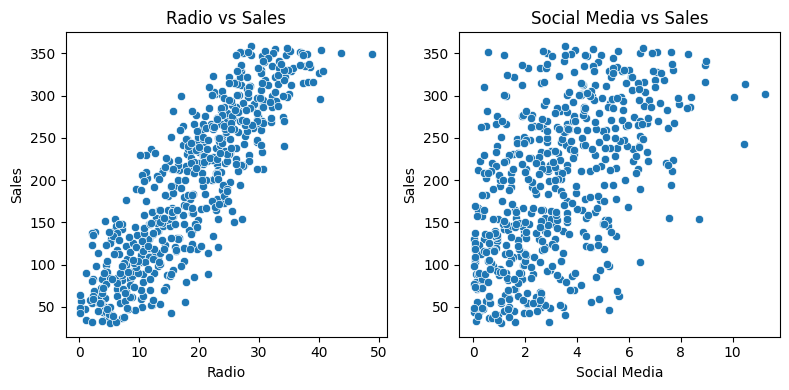

In [9]:
# Create a scatterplot for each independent variable and the dependent variable.

### YOUR CODE HERE ### 

# setting figure size
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# scatterplot between Radio vs Sales to view relationship
sns.scatterplot(x = data['Radio'], y = data['Sales'], ax=axes[0])

# Set the title of the first plot.
axes[0].set_title('Radio vs Sales')

# construct a scatterplot between Social Media vs Sales.
sns.scatterplot(x = data['Social_Media'], y = data['Sales'],ax=axes[1])

# set the title of the second plot.
axes[1].set_title('Social Media vs Sales')

# set the xlabel of the second plot.
axes[1].set_xlabel('Social Media')

# for a clean appearance
plt.tight_layout()


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Use the function in the `seaborn` library that allows you to create a scatterplot to display the values for two variables.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `scatterplot()` function in `seaborn`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>
    
Pass the independent and dependent variables in your model as the arguments for `x` and `y`, respectively, in the `scatterplot()` function. Do this for each continous independent variable in your model.

</details>

**Question:** Is the linearity assumption met?


* for Radio var the linearity assumption seems to have met after observing the scatterplot
* Social media did NOT satisfy the linearity assumption because it did NOT seem to be linearly related with Sales

### Model assumption: Independence

The **independent observation assumption** states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

### Model assumption: Normality

Create the following plots to check the **normality assumption**:

* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


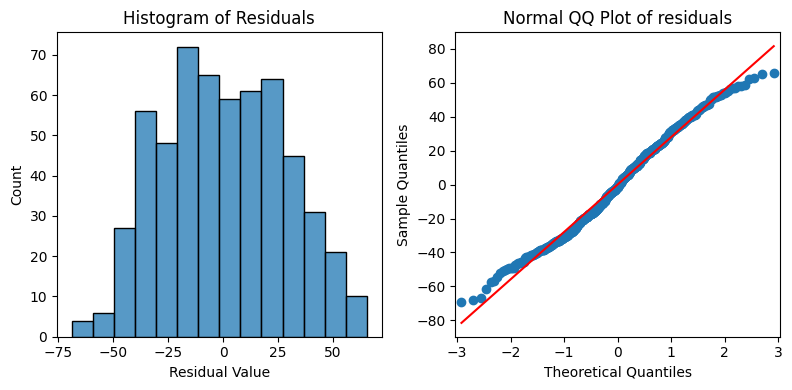

In [10]:
# Calculate the residuals.

### YOUR CODE HERE ### 
residuals = multi_linreg_model.resid

# set the figure size
fig, axes = plt.subplots(1, 2, figsize = (8,4))


# Create a histogram of residuals 

### YOUR CODE HERE ### 
sns.histplot(residuals, ax=axes[0])

# set x label
axes[0].set_xlabel('Residual Value')

# set title
axes[0].set_title('Histogram of Residuals')



# Create a Q-Q plot of the residuals

### YOUR CODE HERE ### 
sm.qqplot(residuals, line='s',ax = axes[1])

# Set the title of the Q-Q plot.
axes[1].set_title('Normal QQ Plot of residuals')

# for clean appearance
plt.tight_layout()

# Show the plot
plt.show()


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Access the residuals from the fit model object.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `model.resid` to get the residuals from a fit model called `model`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

For the histogram, pass the residuals as the first argument in the `seaborn` `histplot()` function.
    
For the Q-Q plot, pass the residuals as the first argument in the `statsmodels` `qqplot()` function.

</details>

**Question:** Is the normality assumption met?



* even though it is not perfectly normally distributed (especially at the tails) the residuals are approximately normally distributed 
* normality assumption is thus met

### Model assumption: Constant variance

Check that the **constant variance assumption** is not violated by creating a scatterplot with the fitted values and residuals. Add a line at $y = 0$ to visualize the variance of residuals above and below $y = 0$.

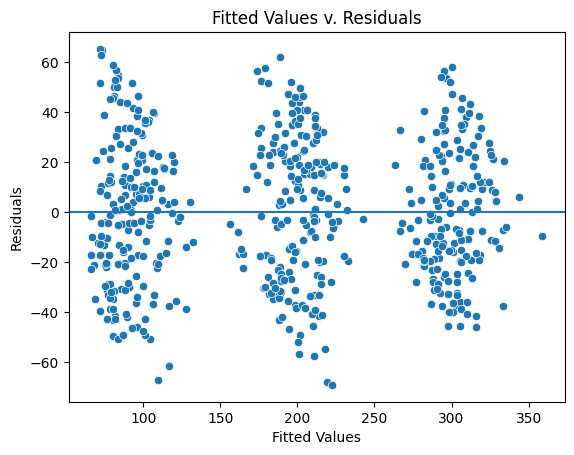

In [11]:
# Create a scatterplot with the fitted values from the model and the residuals.

### YOUR CODE HERE ### 

# constructing a scatterplot
fig = sns.scatterplot(x = multi_linreg_model.fittedvalues, y = multi_linreg_model.resid)

# set x label
fig.set_xlabel('Fitted Values')

# set y label 
fig.set_ylabel('Residuals')

# set title
fig.set_title('Fitted Values v. Residuals')

# Add a line at y = 0 to visualize the variance of residuals above and below 0.

### YOUR CODE HERE ### 

# residual 0 line
fig.axhline(0)

# Show the plot.
plt.show()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Access the fitted values from the model object fit earlier.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `model.fittedvalues` to get the fitted values from a fit model called `model`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>


Call the `scatterplot()` function from the `seaborn` library and pass in the fitted values and residuals.
    
Add a line to a figure using the `axline()` function.

</details>

**Question:** Is the constant variance assumption met?




* the variance of the residuals are grouped into 3 parts as it spread across the fitted values
* but the variance within these 3 groups appear to be randomly spread
* this could be because of the influence of the TV variable (which is a categorical var)
* Thus, constant variance assumption is met

### Model assumption: No multicollinearity

The **no multicollinearity assumption** states that no two independent variables ($X_i$ and $X_j$) can be highly correlated with each other. 

Two common ways to check for multicollinearity are to:

* Create scatterplots to show the relationship between pairs of independent variables
* Use the variance inflation factor to detect multicollinearity

Use one of these two methods to check your model's no multicollinearity assumption.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


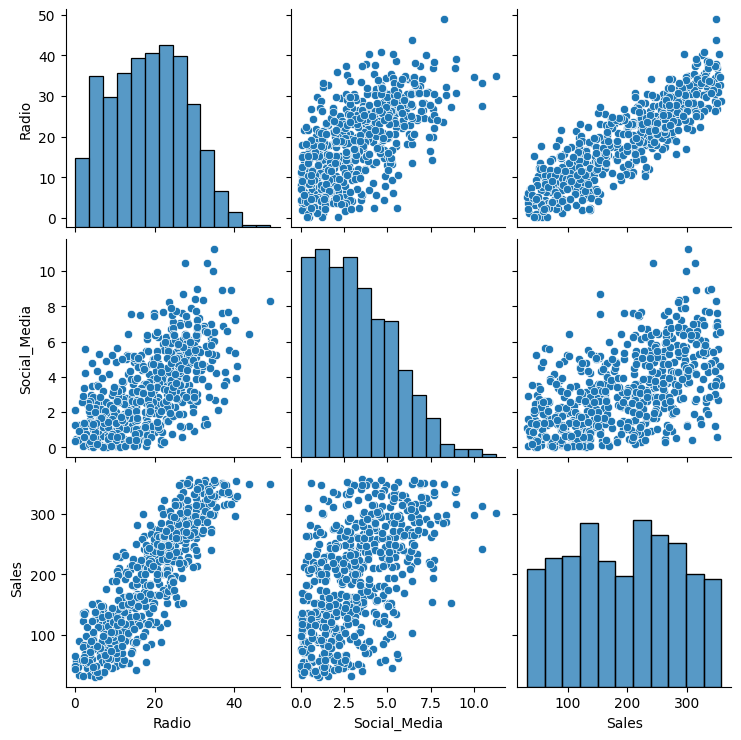

In [12]:
# Create a pairplot of the data.

### YOUR CODE HERE ### 

sns.pairplot(data)

In [13]:
# Calculate the variance inflation factor (optional).

### YOUR CODE HERE ### 

# importing necessary modules
from statsmodels.stats.outliers_influence import variance_inflation_factor

# subsetting the variable under contention
X = data[['Radio','Social_Media']]

# calculate VIF
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# new df for vif values 
df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])

# Display the VIF results.
df_vif

,VIF
Radio,4.93238
Social_Media,4.93238


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Confirm that you previously created plots that could check the no multicollinearity assumption.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The `pairplot()` function applied earlier to `data` plots the relationship between all continous variables  (e.g., between `Radio` and `Social Media`).

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

The `statsmodels` library has a function to calculate the variance inflation factor called `variance_inflation_factor()`. 
    
When using this function, subset the data to only include the continous independent variables (e.g., `Radio` and `Social Media`). Refer to external tutorials on how to apply the variance inflation factor function mentioned previously.
 

</details>

**Question 8:** Is the no multicollinearity assumption met?

* since there is only 1 continuous numeric variable, there are no multicollinearity issues with the current independent variables 

## Step 4: Results and evaluation

### Display the OLS regression results

If the model assumptions are met, you can interpret the model results accurately.

First, display the OLS regression results.

In [14]:
# Display the model results summary.

### YOUR CODE HERE ### 

multi_linreg_model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1782.
Date:                Mon, 10 Feb 2025   Prob (F-statistic):          1.61e-287
Time:                        05:44:26   Log-Likelihood:                -2701.4
No. Observations:                 569   AIC:                             5411.
Df Residuals:                     565   BIC:                             5428.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         217.6367      6.577     33.089      0.000     204.718     230.556
C(TV)[T.Low]     -152.0897      5.160    -29.474      0.000    -162.225    -141.954
C(TV)[T.Medium]   -73.4835      3.587    -20.484      0.000     -80.530     -66.437
Radio               2.8864      0.217     13.306      0.000       2.460       3.312
==============================================================================
Omnibus:                       35.219   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.863
Skew:                           0.087   Prob(JB):                     0.000976
Kurtosis:                       2.255   Cond. No.                         155.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:** What is your interpretation of the model's R-squared?


* R-squared = 0.904
* which means the TV and Radio as features produce a good fit model that explains the 90.4% variation in the Sales 

### Interpret model coefficients

With the model fit evaluated, you can look at the coefficient estimates and the uncertainty of these estimates.

Again, display the OLS regression results.

In [15]:
# Display the model results summary.

### YOUR CODE HERE ### 

multi_linreg_model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1782.
Date:                Mon, 10 Feb 2025   Prob (F-statistic):          1.61e-287
Time:                        05:44:26   Log-Likelihood:                -2701.4
No. Observations:                 569   AIC:                             5411.
Df Residuals:                     565   BIC:                             5428.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         217.6367      6.577     33.089      0.000     204.718     230.556
C(TV)[T.Low]     -152.0897      5.160    -29.474      0.000    -162.225    -141.954
C(TV)[T.Medium]   -73.4835      3.587    -20.484      0.000     -80.530     -66.437
Radio               2.8864      0.217     13.306      0.000       2.460       3.312
==============================================================================
Omnibus:                       35.219   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.863
Skew:                           0.087   Prob(JB):                     0.000976
Kurtosis:                       2.255   Cond. No.                         155.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:** What are the model coefficients?



* Intercept coefficient= 218.5261
 
* TV_low coefficient= − 154.2971
 
* TV_medium coefficient= −75.3120
 
* Radio coefficient= 2.9669

**Question:** How would you write the relationship between `Sales` and the independent variables as a linear equation?



* Sales = (2.9669 * Radio) −(154.2971 * TV_low)  − (75.3120 * TV_medium) + 218.5261

**Question:** What is your intepretation of the coefficient estimates? Are the coefficients statistically significant?



TV var
* default TV_high exists when the OHE values of the other 2 categories in TV (TV_low and TV_medium) takes the zero values
* since both TV_low and TV_medium ahas a negative coefficient with high magnitudes − 154.2971 , −75.3120 respectively
* we can conclude that the TV_high has more say thatn other TV variables when it comes to predicting Sales

Radio var
* Radio has a positive coefficient of 2.9669. This means for every unit increase in Radio value, we can observe 2.9969 times increase in the Sales

p-value
* the p value of all the variables used to build the OLS multi linear regression model is ZERO.
* this proves statistical significance

CI
* the given CI ranges for each variable is for 95% confidence levels. The specific values can be referred in the summary above

**Question:** Why is it important to interpret the beta coefficients?



* Beta coefficients indicate the magnitude and the direction of each feature's influence on the target variable in a regression model


**Question:** What are you interested in exploring based on your model?



* explore more recent datasets and perform validation on live data to check if the model acts good in production
* check if there are other variables that may better inform the model about sales

**Question:** Do you think your model could be improved? Why or why not? How?

* Yes, by adding new variables or by creating new variables from the existing ones, we can check if those inform the prediction of Sales at a better level

## Conclusion

**What are the key takeaways from this lab?**

* Multiple linear regression with continuous numerical data and categorical data (OHE)
* evaluate and judge MLR models using the model summary
* feature selection, multi-collinearity findings and feature transformation to fit the given data into a OLS MLR model

**What results can be presented from this lab?**

Sales = (2.9669 * Radio) −(154.2971 * TV_low) − (75.3120 * TV_medium) + 218.5261  
--> derived from the described estimation process and it yields the following:

TV var
* default TV_high exists when the OHE values of the other 2 categories in TV (TV_low and TV_medium) takes the zero values
* since both TV_low and TV_medium ahas a negative coefficient with high magnitudes − 154.2971 , −75.3120 respectively
* we can conclude that the TV_high has more say thatn other TV variables when it comes to predicting Sales

Radio var
* Radio has a positive coefficient of 2.9669. This means for every unit increase in Radio value, we can observe 2.9969 times increase in the Sales

p-value
* the p value of all the variables used to build the OLS multi linear regression model is ZERO.
* this proves statistical significance

CI
* the given CI ranges for each variable is for 95% confidence levels. The specific values can be referred in the summary above

**How would you frame your findings to external stakeholders?**

* Focusing on TV_high category and Radio can play a significant difference in Sales. 
* In other words, under a constant value of TV_high value, for each unit increase in the Radio budget (1M USD) can result in 2.9669 times (~2.97M USD) the Sales revenue

#### **References**

Saragih, H.S. (2020). [*Dummy Marketing and Sales Data*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data).

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.